## Data with projected coordinates

This example will demonstrate how data with projected coordinates is by default rendered using its native coordinate system.

#### Getting some data

In [1]:
import earthkit

For this example, we will use some data from the European Flood Awareness System (EFAS), which is defined on a **Lambert Azimuthal Equal Area** projection.

In [2]:
efas = earthkit.data.from_source("url", earthkit.data.remote_example_file("efas.nc"))
print(list(efas))

[NetCDFField['dis06',[]], NetCDFField['land_binary_mask',[]], NetCDFField['upArea',[]]]


There are three variables in this file - let's just select the `dis06` (mean river discharge in the last 6 hours) variable.

In [3]:
dis06 = efas[0]

We can examine the projection of the data using the `.projection()` method - as expected, we have a Lambert Azimuthal Equal Area projection.

In [4]:
dis06.projection()

<Derived Projected CRS: +proj=laea +ellps=GRS80 +lon_0=10.0 +lat_0=52.0 +x ...>
Name: unknown
Axis Info [cartesian]:
- E[east]: Easting (metre)
- N[north]: Northing (metre)
Area of Use:
- undefined
Coordinate Operation:
- name: unknown
- method: Lambert Azimuthal Equal Area
Datum: Unknown based on GRS80 ellipsoid
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

#### Plotting the data

If we do not specify a domain or projection for our plot, `earthkit-maps` will automatically use the projection and domain of the source data.

In [5]:
style = earthkit.maps.styles.Contour(
    colors="Blues",
    levels=[0.1, 0.5, 1, 2, 5, 10, 50, 100, 500, 1000, 2000, 3000, 4000],
    extend="max",
)

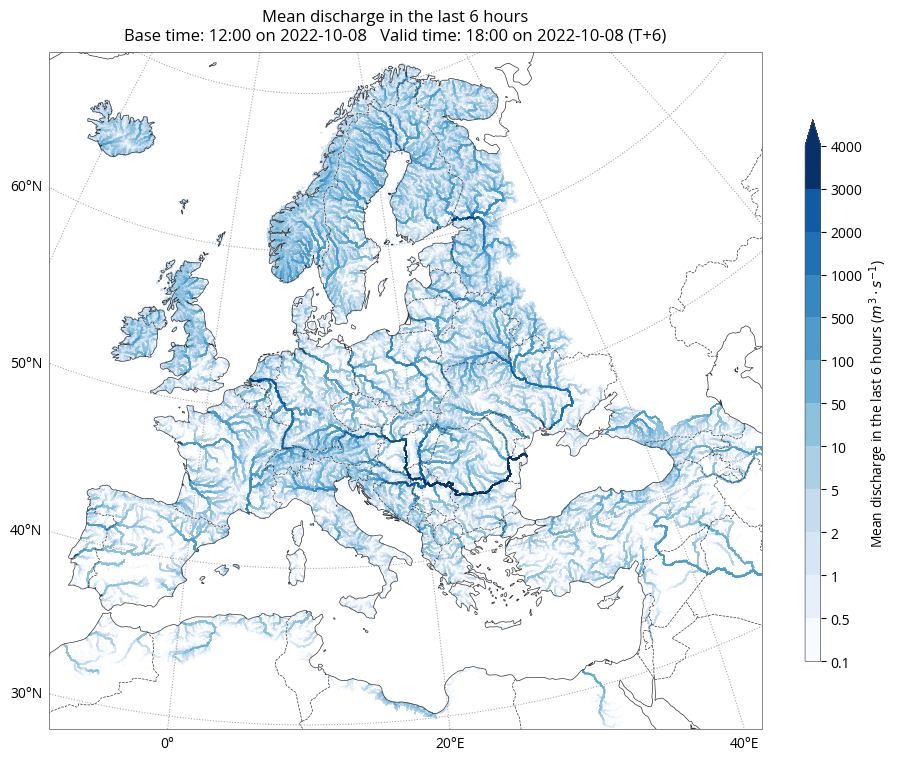

In [ ]:
chart = earthkit.maps.Superplot()

chart.plot(dis06, style=style)

chart.coastlines()
chart.gridlines()
chart.borders()
chart.title()
chart.legend(location="right")
chart.show()

You can of course specify a a different `domain` and/or `crs` if desired.

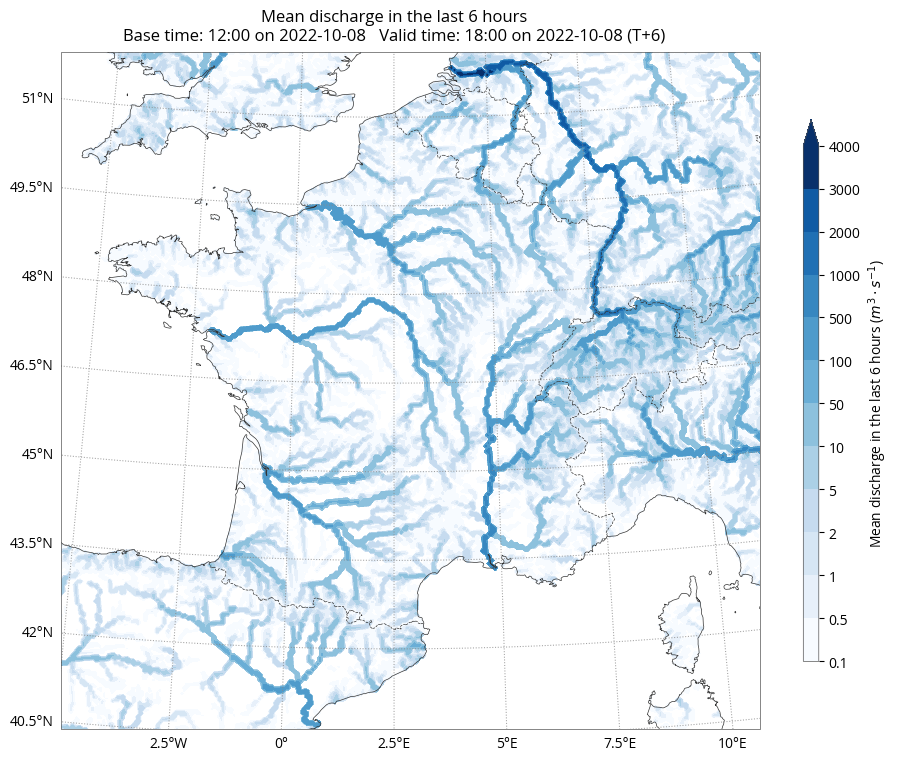

In [7]:
chart = earthkit.maps.Superplot(domain="France")

chart.plot(dis06, style=style)

chart.coastlines()
chart.gridlines()
chart.borders()
chart.title()
chart.legend(location="right")
chart.show()

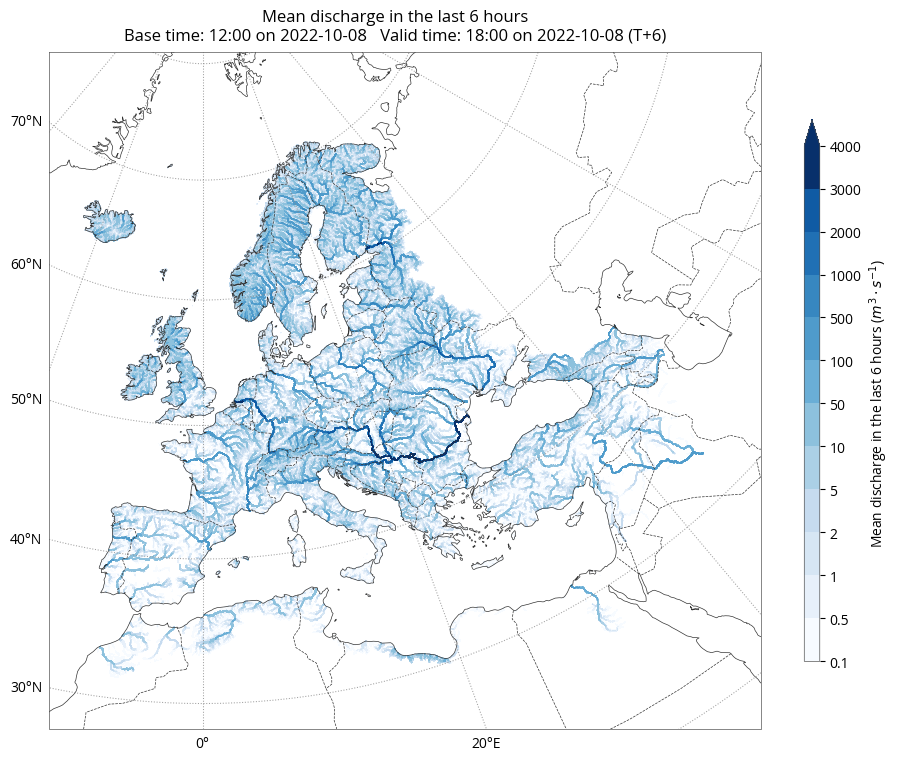

In [8]:
import cartopy.crs as ccrs

chart = earthkit.maps.Superplot(crs=ccrs.NorthPolarStereo())

chart.plot(dis06, style=style)

chart.coastlines(resolution="medium")
chart.gridlines()
chart.borders()
chart.title()
chart.legend(location="right")
chart.show()